In [7]:
import os
import re
import jieba 
from zhon.hanzi import punctuation
import string
import wordcloud # 词云展示
import collections # 词频统计
import pandas as pd
import matplotlib.pyplot as plt 

In [26]:
def WordCountsShow(filename):
    SData=pd.read_csv('C:/Users/86178/Desktop/青岛统计建模/景点评论/'+filename)#,index_col=0
    SData=SData[SData['评论'].notna()]
    ComList=list(SData['评论'])
    string_data="".join(ComList) 
    # 文本预处理
    pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"') # 定义正则表达式匹配模式
    string_data = re.sub(pattern, '', string_data) # 将符合模式的字符去除
    #去掉标点
    punctuation_list=punctuation+string.punctuation+" "
    for pun in punctuation_list:
        string_data=string_data.replace(pun,'')
    # 文本分词
    seg_list_exact = jieba.cut(string_data, cut_all = False) # 精确模式分词
    object_list = []
    # 自定义去除词库
    with open ('stoplist.txt','r',newline='',encoding='utf-8') as txtfile:
            stoplist=txtfile.read()
            for word in seg_list_exact:
                if word not in stoplist:
                    object_list.append(word)

                    
    # 词频统计
    word_counts = collections.Counter(object_list) # 对分词做词频统计
    word_counts_top100 = word_counts.most_common(100) # 获取前10最高频的词
    print (word_counts_top100) # 输出检查
    WordCounts=pd.DataFrame({'Word':[counts[0] for counts in word_counts_top100],
                  'Counts':[counts[1] for counts in word_counts_top100]})
    WordCounts.to_csv(r'C:\Users\86178\Desktop\青岛统计建模\词频统计\WordCounts'+filename,encoding='utf-8-sig',index=False)
    # 词频展示
    wc = wordcloud.WordCloud(
        font_path="simsun.ttc", # 设置字体格式
        background_color="white", # 设置背景
        max_words=200, # 最多显示词数
        max_font_size=100 # 字体最大值
    )
    wc.generate_from_frequencies(word_counts) # 从字典生成词云
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.savefig('C:/Users/86178/Desktop/青岛统计建模/词云图/'+filename[:-4]+".jpg")
    plt.show() # 显示图像
    print(filename[:-4]+" done!")

[('表演', 32609), ('不错', 32185), ('孩子', 23274), ('世界', 16134), ('动物', 13998), ('海底', 12686), ('感觉', 12455), ('喜欢', 12294), ('人太多', 10858), ('地方', 10650), ('海豚', 9706), ('开心', 9467), ('海洋', 9067), ('时间', 8651), ('极地', 8542), ('值得', 7979), ('剧场', 7978), ('欢乐', 7618), ('好玩', 7226), ('环境', 6909), ('水母', 6358), ('好看', 5897), ('小时', 5867), ('设施', 5281), ('推荐', 5202), ('排队', 5162), ('服务', 4990), ('极地馆', 4948), ('海洋馆', 4702), ('取票', 4605), ('便宜', 4580), ('建议', 4555), ('精彩', 4391), ('好多', 3845), ('体验', 3827), ('美团', 3825), ('鱼', 3643), ('价格', 3556), ('适合', 3552), ('可爱', 3473), ('第一次', 3470), ('不好', 3136), ('深海', 3084), ('门票', 3046), ('没什么', 2974), ('团购', 2972), ('贵', 2950), ('满意', 2944), ('项目', 2915), ('还行', 2901), ('美人鱼', 2880), ('挤', 2767), ('工作人员', 2757), ('场馆', 2734), ('想象', 2731), ('白鲸', 2723), ('买票', 2714), ('海狮', 2685), ('去过', 2617), ('企鹅', 2616), ('旅游', 2597), ('游玩', 2555), ('小朋友', 2527), ('5D', 2495), ('人多', 2461), ('奇幻', 2459), ('海洋生物', 2458), ('种类', 2449), ('还好', 2427), ('标本', 2379), (

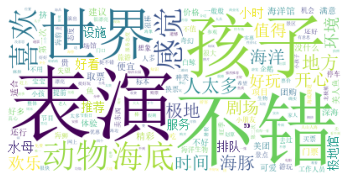

AquariumAll done!


In [33]:
WordCountsShow('AquariumAll.csv')